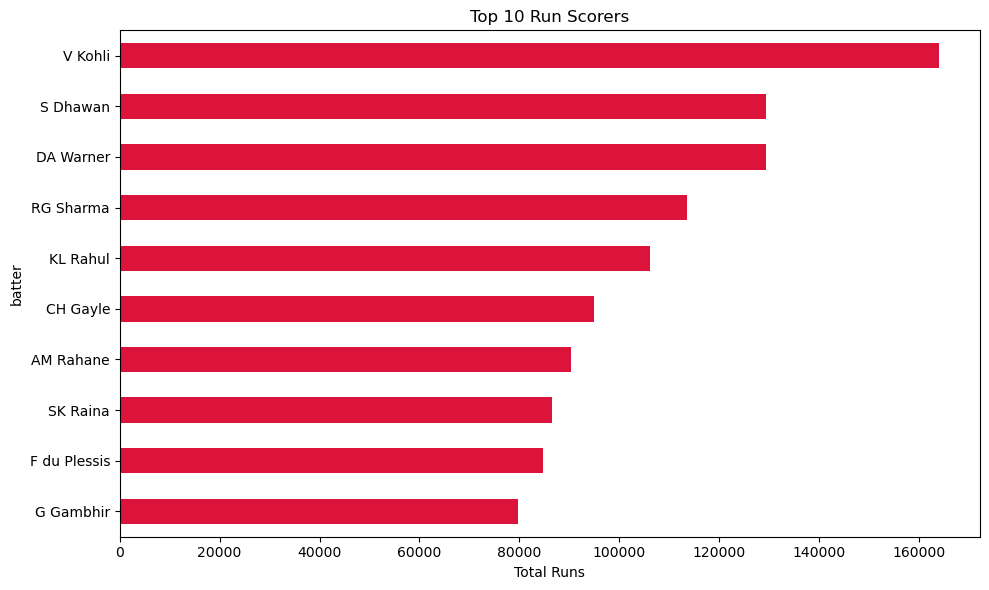

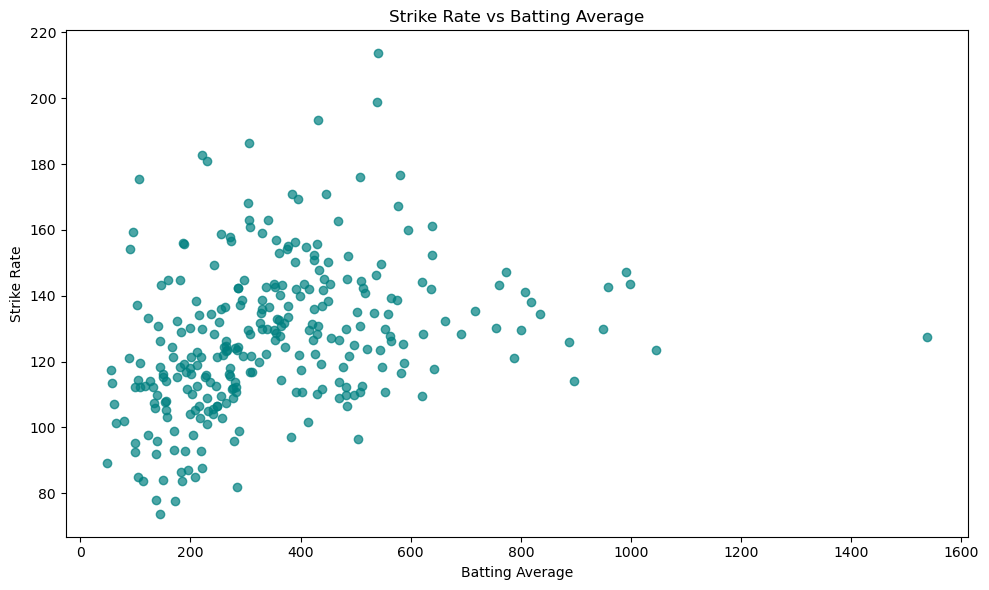

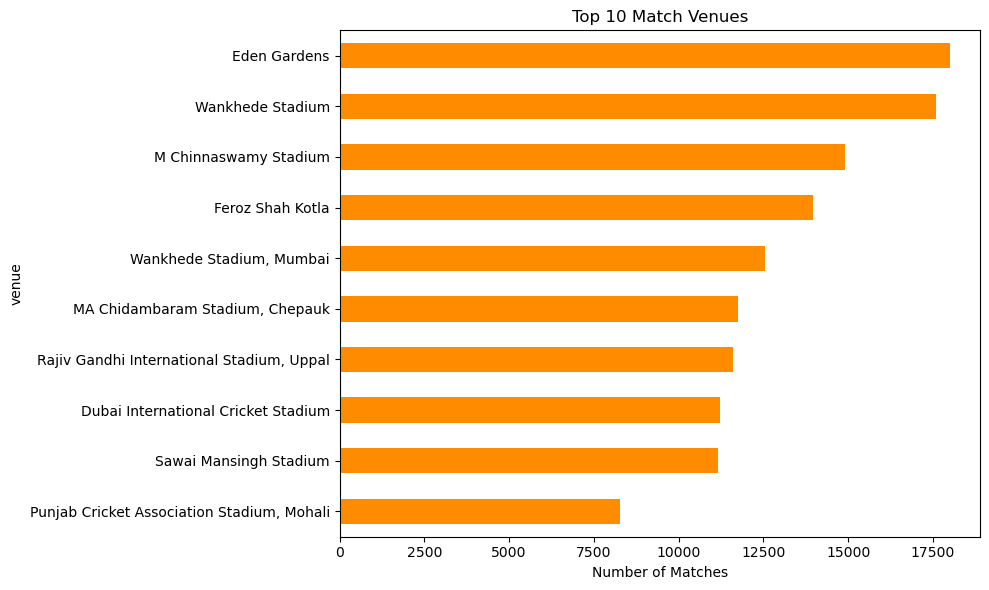

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with low_memory=False to avoid dtype warnings
df = pd.read_csv('C:/Users/ASUS/Downloads/archive/IPL.csv', low_memory=False)

# Clean and transform data
df = df.drop(columns=[
    "Unnamed: 0", "review_batter", "team_reviewed", "review_decision", "umpire",
    "superover_winner", "result_type", "method", "new_batter", "next_batter", "extra_type",
    "fielders", "wicket_kind", "player_out"
], errors='ignore')  # errors='ignore' in case any column is missing

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Add 'is_boundary' and 'strike_rate'
df['is_boundary'] = df['runs_batter'].isin([4, 6])
df['strike_rate'] = df.apply(
    lambda row: (row['batter_runs'] / row['batter_balls']) * 100 if row['batter_balls'] > 0 else 0,
    axis=1
)

# ==========================
# Plot 1: Top 10 Run Scorers
# ==========================
top_scorers = df.groupby("batter")["batter_runs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_scorers.plot(kind='barh', color='crimson')
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_run_scorers.png")
plt.show()

# ===================================
# Plot 2: Strike Rate vs Batting Avg
# ===================================
stats = df.groupby("batter").agg({
    "batter_runs": "sum",
    "batter_balls": "sum",
    "striker_out": "sum"
}).query("batter_balls > 1000")  # Only players with >1000 balls

stats["strike_rate"] = (stats["batter_runs"] / stats["batter_balls"]) * 100
stats["average"] = stats["batter_runs"] / stats["striker_out"].replace(0, 1)

plt.figure(figsize=(10, 6))
plt.scatter(stats["average"], stats["strike_rate"], alpha=0.7, color='teal')
plt.title("Strike Rate vs Batting Average")
plt.xlabel("Batting Average")
plt.ylabel("Strike Rate")
plt.tight_layout()
plt.savefig("strike_rate_vs_average.png")
plt.show()

# ================================
# Plot 3: Most Frequent Match Venues
# ================================
top_venues = df["venue"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_venues.plot(kind="barh", color="darkorange")
plt.title("Top 10 Match Venues")
plt.xlabel("Number of Matches")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_venues.png")
plt.show()
